In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
mydata=pd.read_csv("/content/50_Startups.csv")

In [ ]:
mydata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


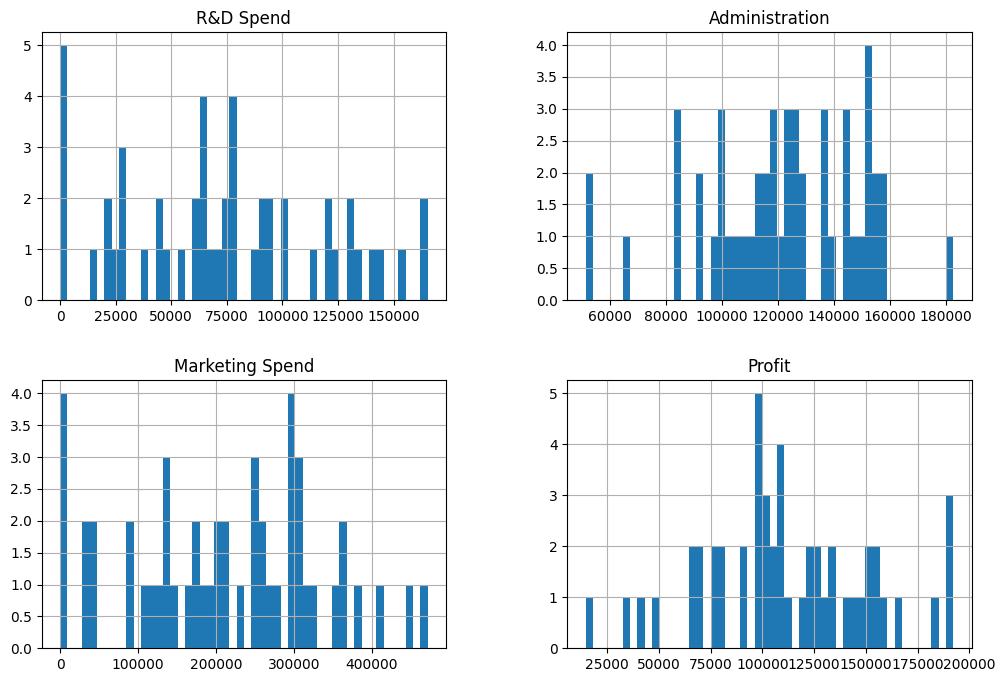

In [ ]:
mydata.hist(bins=50, figsize=(12,8))
plt.show()

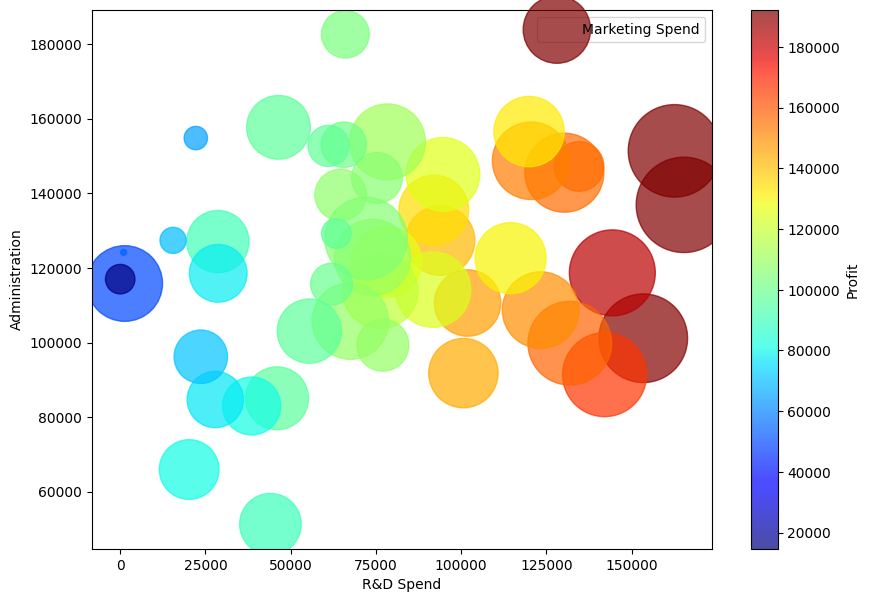

In [ ]:
mydata.plot(kind="scatter", x="R&D Spend", y="Administration", c="Profit", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=mydata['Marketing Spend']/100, label="Marketing Spend", alpha=0.7)
plt.show()

In [ ]:
mydata.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
mydata.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
X = mydata[["R&D Spend"]]
y = mydata["Profit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
r2_score( y_test, y_pred)

0.9265108109341951

In [ ]:
print(lr.intercept_)

49336.6680379911


In [ ]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [ ]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [ ]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [ ]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


The model is generally effective in predicting the dependent variable, but there are instances where the prediction errors are large.
his suggests that while the model works well for many cases, improvements or adjustments might be needed for better performance, especially for extreme values or outliers.The r square value of 0.9265 indicates that the model explains 92.65% of the variance in the dependent variable.

the intercept of 49336.67 represents the predicted value of the dependent variable when the independent variable(s) is 0. In this case, when all predictors are 0, the model predicts the value to be 49336.67.

The model shows excellent predictive performance with R square of 0.9265, meaning it explains most of the variance in the data. The intercept suggests a strong baseline value when predictors are zero.